In [19]:
library(readr) # for importing the datafile
library(afex) # for the anova
library(tidyverse) # for restructuring it
library(rstatix) # for testing assumptions
library(ggpubr) # for graphical test of normality
library(emmeans) # for post-hoc tests


In [20]:
d_long <- read.csv("puls/puls_long.tsv", sep="\t")
names(d_long)[names(d_long) == "puls"] <- "pulse"
d_long

run,prob_nr,age,sex,group,time_point,pulse,phase,run_phase,repetition,trial_type,condition
<int>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>
1,2,26,F,Musik,0,58.98,-1,-1,0,pause,pause
2,2,26,F,Musik,0,66.18,-1,-1,0,pause,pause
1,3,23,M,Musik,0,52.59,-1,-1,0,pause,pause
2,3,23,M,Musik,0,52.47,-1,-1,0,pause,pause
1,5,25,M,Musik,0,81.10,-1,-1,0,pause,pause
2,5,25,M,Musik,0,93.00,-1,-1,0,pause,pause
1,6,27,M,Musik,0,64.72,-1,-1,0,pause,pause
2,6,27,M,Musik,0,60.98,-1,-1,0,pause,pause
1,7,24,F,Sound,0,82.16,-1,-1,0,pause,pause


In [21]:
d_long$type <- as.factor(d_long$trial_type)
d_long$condition <- as.factor(d_long$condition)
d_long$group <- as.factor(d_long$group)
d_long$sex <- as.factor(d_long$sex)
d_long$time<- as.factor(paste(d_long$run, d_long$repetition, sep = "_"))

# bad data structure. See what happens if I eliminate all rows that are "pause" in "condition"

d_long_new <- d_long[d_long$condition != "pause", ] 

In [22]:
d_long_new


,run,prob_nr,age,sex,group,time_point,pulse,phase,run_phase,repetition,trial_type,condition,type,time
,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<fct>,<fct>,<fct>
241,1,2,26,F,Musik,5,58.98,0,0,1,relax,rotation,relax,1_1
242,2,2,26,F,Musik,5,66.18,0,8,1,stress,rotation,stress,2_1
243,1,3,23,M,Musik,5,52.59,0,0,1,relax,rotation,relax,1_1
244,2,3,23,M,Musik,5,52.47,0,8,1,stress,rotation,stress,2_1
245,1,5,25,M,Musik,5,81.10,0,0,1,relax,rotation,relax,1_1
246,2,5,25,M,Musik,5,93.00,0,8,1,stress,rotation,stress,2_1
247,1,6,27,M,Musik,5,64.72,0,0,1,relax,rotation,relax,1_1
248,2,6,27,M,Musik,5,60.98,0,8,1,stress,rotation,stress,2_1
249,1,7,24,F,Sound,5,82.16,0,0,1,relax,rotation,relax,1_1


In [ ]:
# our four factors are:
# music vs sound (d_long$group, btw)
# stress vs relaxation (d_long$type, wth)
# maths vs rotation (d_long$condition, wth)
# run + repetition within run (d_long$time, wth)
# 
# covariates are:
# age (d_long$age, btw)
# gender (d_long$sex, btw)

Test assumptions

In [23]:
# 1) normality

d_long_new %>%
  group_by(time, type, condition, group) %>%
  shapiro_test(pulse)

d_long_new %>%
  group_by(time, type, condition, group) %>%
  summary()

group,condition,type,time,variable,statistic,p
<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
Musik,math,relax,1_1,pulse,0.9401802,8.179570e-14
Sound,math,relax,1_1,pulse,0.9148453,2.969644e-15
Musik,rotation,relax,1_1,pulse,0.9556723,1.435407e-11
Sound,rotation,relax,1_1,pulse,0.9358066,5.049704e-13
Musik,math,stress,1_1,pulse,0.9178103,1.952265e-16
Sound,math,stress,1_1,pulse,0.9486521,2.127275e-11
Musik,rotation,stress,1_1,pulse,0.9586301,4.390577e-11
Sound,rotation,stress,1_1,pulse,0.9620077,2.124804e-09
Musik,math,relax,1_2,pulse,0.9356989,2.180278e-14


      run         prob_nr           age        sex        group     
 Min.   :1.0   Min.   : 2.00   Min.   :21.00   F:7848   Musik:8502  
 1st Qu.:1.0   1st Qu.: 9.75   1st Qu.:23.00   M:7848   Sound:7194  
 Median :1.5   Median :15.50   Median :24.00                        
 Mean   :1.5   Mean   :15.83   Mean   :24.21                        
 3rd Qu.:2.0   3rd Qu.:22.25   3rd Qu.:25.00                        
 Max.   :2.0   Max.   :29.00   Max.   :30.00                        
   time_point        pulse            phase         run_phase     
 Min.   :  5.0   Min.   : 46.21   Min.   :0.000   Min.   : 0.000  
 1st Qu.:106.0   1st Qu.: 67.57   1st Qu.:1.000   1st Qu.: 3.000  
 Median :227.0   Median : 75.82   Median :3.000   Median : 7.500  
 Mean   :237.2   Mean   : 77.93   Mean   :3.498   Mean   : 7.498  
 3rd Qu.:369.0   3rd Qu.: 86.75   3rd Qu.:6.000   3rd Qu.:11.000  
 Max.   :470.0   Max.   :132.61   Max.   :7.000   Max.   :15.000  
   repetition     trial_type           condition

In [40]:
ggqqplot(d_long_new[group = 'Musik'], "pulse", ggtheme = theme_bw(),
         title = 'Probanden in Musikbedingung') +
  facet_grid(time ~ type)

ggqqplot(d_long_new[group = 'Sound'], "pulse", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ type)

ggqqplot(d_long_new[group = 'Sound'], "puls", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ group)

ggqqplot(d_long_new[group = 'Sound'], "pulse", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(time ~ group)


ggqqplot(d_long_new[group = 'Musik'], "pulse", ggtheme = theme_bw(),
         title = 'Probanden in Musikbedingung') +
  facet_grid(time ~ type)

ggqqplot(d_long_new[group = 'Sound'], "pulse", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ type)

ggqqplot(d_long_new[group = 'Sound'], "pulse", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ group)

ggqqplot(d_long_new[group = 'Sound'], "pulse", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(time ~ group)

# qqplots show that distribution is mostly OK

ERROR: Error in `[.data.frame`(d_long_new, group = "Musik"): unused argument (group = "Musik")


In [41]:
# Installing
install.packages("readr")
# Loading
library("readr")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [43]:
# 2) homogeneity of variance (only for between-subject factors)

d_long %>%
  group_by(run, phase) %>%
  levene_test(pulse ~ group)
# not given, we need to correct the results.

run,phase,df1,df2,statistic,p
<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,-1,1,4150,159.54272,6.472457e-36
1,0,1,982,18.23992,2.136683e-05
1,1,1,982,21.82322,3.405608e-06
1,2,1,982,35.73048,3.167623e-09
1,3,1,982,16.72044,4.685578e-05
1,4,1,958,48.35550,6.575091e-12
1,5,1,982,39.38502,5.212229e-10
1,6,1,982,22.12036,2.927059e-06
1,7,1,982,47.34843,1.057511e-11


In [ ]:
# 3) assumption of sphericity (only for within-subject factors)

# will be checked and corrected for automatically when computing the ANOVA. Look at that then.

Define model 

In [34]:
model1 <- aov_ez("prob_nr", # Variable/column defining your participants
       "pulse", # dv
       d_long, # name of your dataframe
       between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
       within = c("time", "condition", "type"), 
       include_aov = TRUE)


model1
summary(model1)

ERROR: Error: Empty cells in within-subjects design  (i.e., bad data structure).
table(data[c("time", "condition", "type")])
# , , type = pause
# 
#       condition
# time   math pause rotation
#   X1_0    0  4152        0
#   X1_1    0     0        0
#   X1_2    0     0        0
#   X2_0    0  4152        0
#   X2_1    0     0        0
#   X2_2    0     0        0
# 
# , , type = relax
# 
#       condition
# time   math pause rotation
#   X1_0    0     0        0
#   X1_1  984     0      984
#   X1_2  984     0      960
#   X2_0    0     0        0
#   X2_1  984     0      984
#   X2_2  984     0      984
# 
# , , type = stress
# 
#       condition
# time   math pause rotation
#   X1_0    0     0        0
#   X1_1  984     0      984
#   X1_2  984     0      984
#   X2_0    0     0        0
#   X2_1  984     0      984
#   X2_2  984     0      960
# 


In [44]:
# with pause excluded

model1 <- aov_ez("prob_nr", # Variable/column defining your participants
                 "pulse", # dv
                 d_long_new, # name of your dataframe
                 between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
                 within = c("time", "condition", "type"), 
                 include_aov = TRUE)
model1
summary(model1)
write_tsv(summary(model1), path = "model1.txt")

# we see that the assumption of sphericity was corrected for using the Greenhouse-Geisser correction
# we also see that we have an effect for time
# and for time*condition*type

Warning message:
“More than one observation per cell, aggregating the data using mean (i.e, fun_aggregate = mean)!”
Contrasts set to contr.sum for the following variables: group, sex



Anova Table (Type 3 tests)

Response: pulse
                          Effect          df     MSE         F   ges p.value
1                          group       1, 20 3012.10      0.00 <.001    .946
2                            sex       1, 20 3012.10      1.60  .068    .220
3                      group:sex       1, 20 3012.10      0.13  .006    .724
4                           time 1.99, 39.75   49.49 14.99 ***  .022   <.001
5                     group:time 1.99, 39.75   49.49      1.70  .003    .197
6                       sex:time 1.99, 39.75   49.49      0.48 <.001    .619
7                 group:sex:time 1.99, 39.75   49.49      0.55 <.001    .580
8                      condition       1, 20    9.66    5.36 * <.001    .031
9                group:condition       1, 20    9.66      0.63 <.001    .437
10                 sex:condition       1, 20    9.66      0.04 <.001    .853
11           group:sex:condition       1, 20    9.66      1.65 <.001    .213
12                          type


Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

                               Sum Sq num Df Error SS den Df  F value    Pr(>F)
(Intercept)                   2292846      1    60242     20 761.2120 < 2.2e-16
group                              14      1    60242     20   0.0046  0.946340
sex                              4826      1    60242     20   1.6024  0.220117
group:sex                         386      1    60242     20   0.1281  0.724132
time                             1474      3     1967     60  14.9880 2.161e-07
group:time                        167      3     1967     60   1.6954  0.177589
sex:time                           47      3     1967     60   0.4829  0.695396
group:sex:time                     54      3     1967     60   0.5505  0.649734
condition                          52      1      193     20   5.3639  0.031290
group:condition                     6      1      193     20   0.6288  0.437098
sex:condition                       0      1      193 

Warning message:
“The `path` argument of `write_tsv()` is deprecated as of readr 1.4.0.
Please use the `file` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


ERROR: Error in write_delim(x, file, delim = "\t", na = na, append = append, : is.data.frame(x) is not TRUE


post hoc tests:

In [36]:
m1_ph <- emmeans(model1, "time") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m1_ph
pairs(m1_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

 time emmean   SE df lower.CL upper.CL
 X1_1   81.2 2.88 20     75.2     87.2
 X1_2   76.9 2.71 20     71.2     82.5
 X2_1   76.9 2.95 20     70.8     83.1
 X2_2   76.3 2.92 20     70.2     82.4

Results are averaged over the levels of: group, sex, type, condition 
Confidence level used: 0.95 

 contrast    estimate    SE df t.ratio p.value
 X1_1 - X1_2   4.3334 0.909 20   4.765  0.0006
 X1_1 - X2_1   4.3083 0.949 20   4.539  0.0011
 X1_1 - X2_2   4.9229 1.034 20   4.761  0.0006
 X1_2 - X2_1  -0.0252 0.795 20  -0.032  1.0000
 X1_2 - X2_2   0.5895 0.795 20   0.742  0.8791
 X2_1 - X2_2   0.6146 0.310 20   1.981  0.2281

Results are averaged over the levels of: group, sex, type, condition 
P value adjustment: tukey method for comparing a family of 4 estimates 

In [37]:
c1 <- list(run1vsrun2 = c(1, 1, -1, -1), 
           run1wdh = c(1, -1, 0, 0),
           run2wdh = c(0, 0, 1, -1)# this vector gives each line in the object 'm1_ph' a weight
          )

# if several contrasts are defined, these go into a list of vectors and each get their own name.
  
contrast(m1_ph, c1, adjust = "holm") # here we define how to adjust the alpha-level, specified here is the Bonferroni-Holm correction, 
                                     # which is less strict than the Bonferroni correction

# and we see: there is a difference, t(20) = 3.222, p = 0.0043

 contrast   estimate    SE df t.ratio p.value
 run1vsrun2    4.898 1.520 20   3.222  0.0085
 run1wdh       4.333 0.909 20   4.765  0.0004
 run2wdh       0.615 0.310 20   1.981  0.0615

Results are averaged over the levels of: group, sex, type, condition 
P value adjustment: holm method for 3 tests 

plots

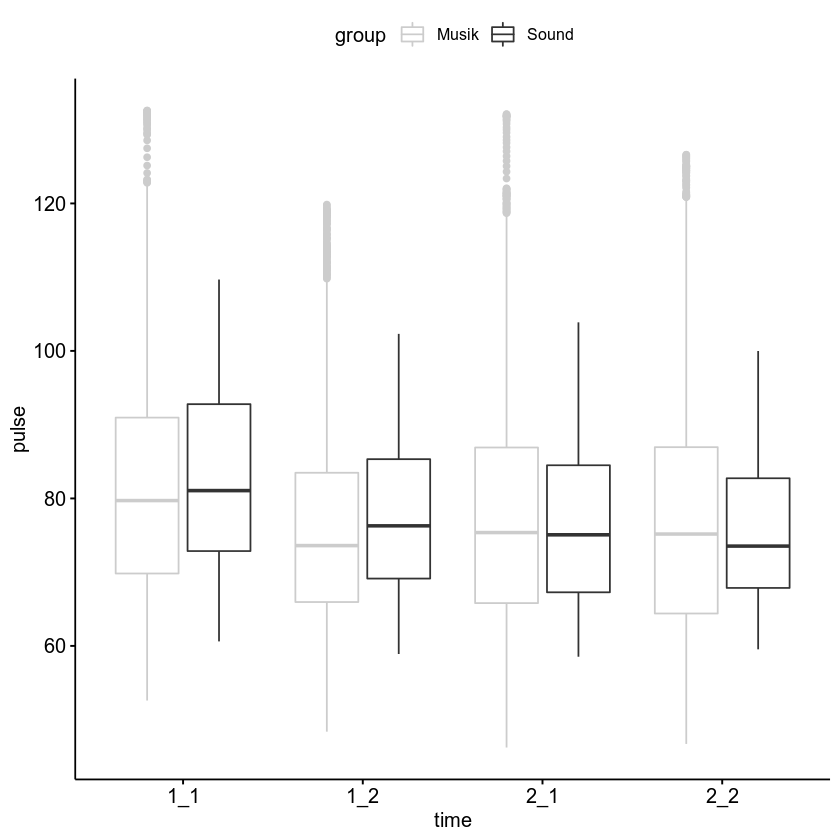

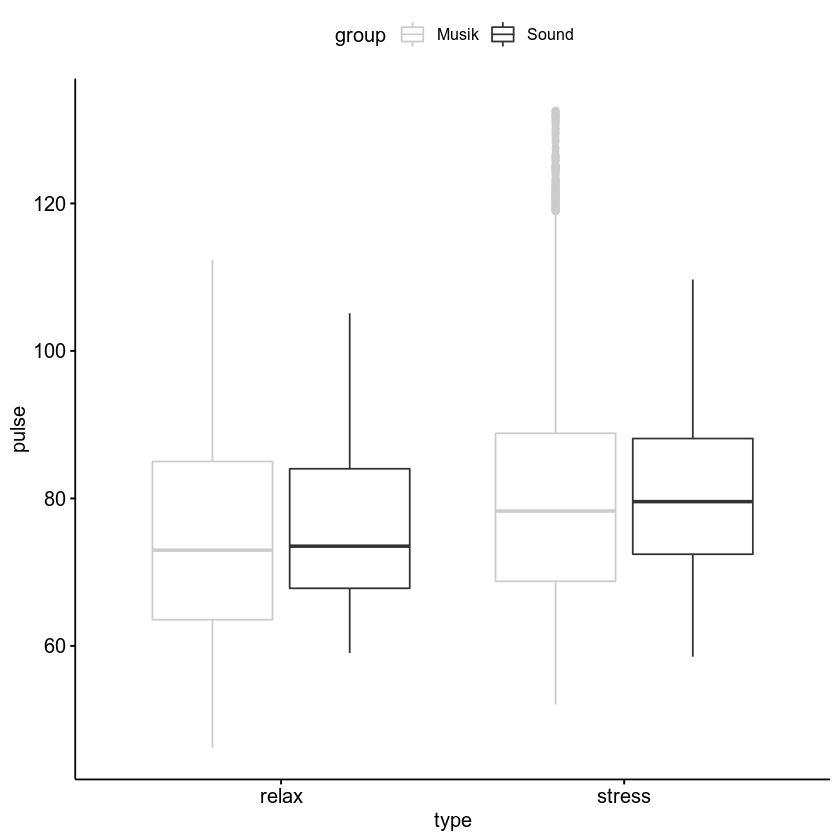

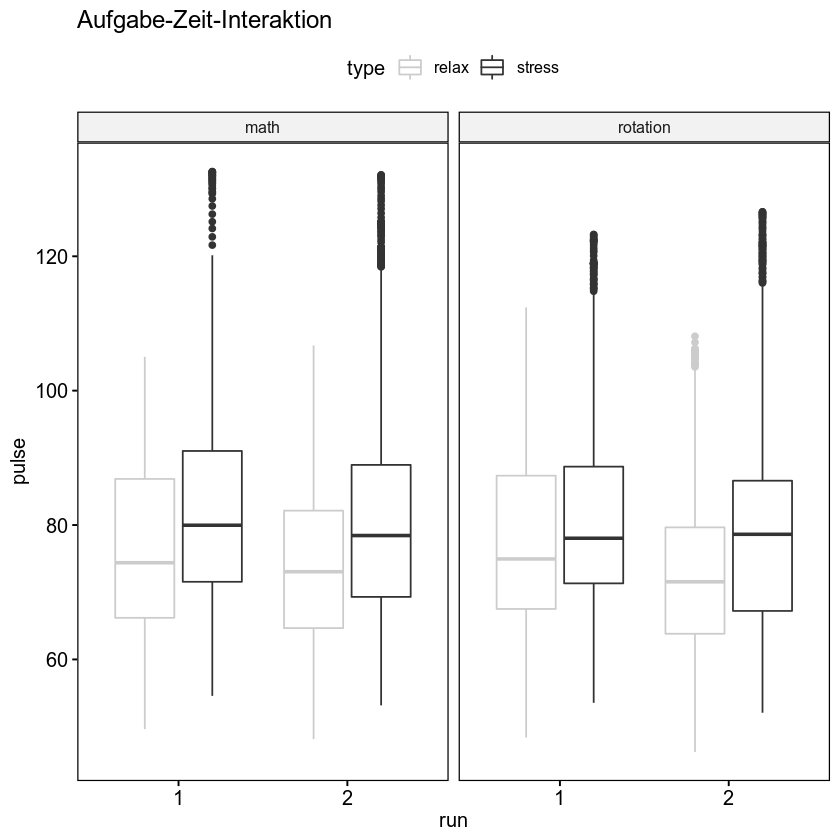

In [39]:
p_groupxtime <- ggboxplot(
  d_long_new, x = "time", y = "pulse",
  color = "group", palette = "grey"
)
p_groupxtime
  

p_groupxtype <- ggboxplot(
  d_long_new, x = "type", y = "pulse",
  color = "group", palette = "grey"
)
p_groupxtype 


p_timextype1 <- ggboxplot(
  d_long_new, x = "run", y = "pulse", facet.by = "condition",
  color = "type", palette = "grey", title = "Aufgabe-Zeit-Interaktion",
)
p_timextype1